## Mounting the asset directory containing dataset

In [1]:
import os

local_assets_b = False

if local_assets_b:
  assets_dir = "/content/assets/P2/"

  if not os.path.isdir(assets_dir):
    assert os.path.isfile("assets.zip")
    os.system("unzip assets.zip")
else:
  from google.colab import drive
  drive.mount('/content/drive')
  assets_dir = '/content/drive/MyDrive/CV-1/assets/P2/'

Mounted at /content/drive


## VGG


### What is VGG?
VGG (Visual Geometry Group) is a popular deep convolutional neural network (CNN) architecture developed by the Visual Geometry Group at the University of Oxford. VGGNet is known for its simplicity and effectiveness in image classification tasks. It consists of multiple convolutional layers followed by fully connected layers. The most common variant, VGG-16, has 16 layers, including 13 convolutional layers and 3 fully connected layers. VGGNet has achieved impressive results on various image classification benchmarks, including the ImageNet challenge.

In [2]:
import torch
import torch.nn as nn

In [3]:
class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7 * 16, 4096), nn.ReLU(True), nn.Dropout(),
            nn.Linear(4096, 4096), nn.ReLU(True), nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        layer_outputs = []

        x = self.features[0](x)
        layer_outputs.append(x)

        x = self.features[1](x)
        layer_outputs.append(x)

        x = self.features[2](x)
        layer_outputs.append(x)

        x = self.features[3](x)
        layer_outputs.append(x)

        x = self.features[4](x)
        layer_outputs.append(x)

        x = self.features[5](x)
        layer_outputs.append(x)

        x = self.features[6](x)
        layer_outputs.append(x)

        x = self.features[7](x)
        layer_outputs.append(x)

        x = self.features[8](x)
        layer_outputs.append(x)

        x = self.features[9](x)
        layer_outputs.append(x)

        x = self.features[10](x)
        layer_outputs.append(x)

        x = self.features[11](x)
        layer_outputs.append(x)

        x = self.features[12](x)
        layer_outputs.append(x)

        x = self.features[13](x)
        layer_outputs.append(x)

        x = self.features[14](x)
        layer_outputs.append(x)

        x = self.features[15](x)
        layer_outputs.append(x)

        x = self.features[16](x)
        layer_outputs.append(x)

        x = self.features[17](x)
        layer_outputs.append(x)

        x = x.view(x.size(0), -1)

        x = self.classifier[0](x)
        layer_outputs.append(x)  # Output after first fully connected layer

        x = self.classifier[1](x)
        layer_outputs.append(x)  # Output after second fully connected layer

        x = self.classifier[2](x)
        layer_outputs.append(x)  # Final output layer

        return x, layer_outputs


In [4]:
# Initialise the model
vgg_model = VGG16(num_classes=10)
print(vgg_model)

VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [ ]:
total_params = sum(p.numel() for p in vgg_model.parameters())
print(f"Total Parameters: {total_params}")

Total Parameters: 1675708234


In [ ]:
input_tensor = torch.rand(1, 3, 224, 224)
# Get intermediate layer outputs
x, layer_outputs = vgg_model(input_tensor)

# Print layer outputs
for i, output in enumerate(layer_outputs):
    print(f"Output after layer {i + 1}: {output.shape}")

print("Final layer output: ", x.shape)

## ResNet



### Residual Networks (ResNet)

ResNet, short for Residual Network, is a specific type of neural network that was introduced in 2015 by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in their paper “Deep Residual Learning for Image Recognition”. The ResNet models were extremely successful, winning 1st place in the ILSVRC 2015 classification competition with a top-5 error rate of 3.57%. ResNet is a fully convolutional neural network with an encoder-decoder structure that has been adapted to incorporate other convolutional neural network architecture designs. The architecture of ResNet can be broadly thought of as a deep neural network with skip connections between layers that add the outputs from previous layers to the outputs of stacked layers. This results in the ability to train much deeper neural networks without running into the vanishing gradient problem. ResNet has many variants that run on the same concept but have different numbers of layers. ResNet50 is used to denote the variant that can work with 50 neural network layers. ResNet has significantly enhanced the performance of neural networks with more layers and has been used in various domains, including computer vision and biomedical imaging.



## Designing ResNet


Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385



### Residual Layer

As discussed, after two convolution operations, input of those 2 convolution is added to their output. That is what we are implementing in the below code.


* Each residual block consists of 2 convolution operations
* Convolution -> batch norm -> Relu
* Except if downsampling has to be applied then the 2nd conv layer's output is added to input before applying ReLU.

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class ResidualLayer(nn.Module):
    def __init__(self, inp_c, out_c, stride = 1, downsample = None):
        super().__init__()
        self.conv1 = nn.Conv2d(inp_c, out_c, kernel_size = 3, stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_c)
        self.relu = nn.ReLU(inplace = True)
        self.conv2 = nn.Conv2d(out_c, out_c, kernel_size = 3, stride = 1, padding =1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_c)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            x = self.downsample(x)
        out += x  # residual connection
        out = self.relu(out)
        return out

In [ ]:
ResidualLayer(64, 128)

ResidualLayer(
  (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

### make_block method

One of the defining characteristics of ResNet is its deep and repetitive structure, where residual blocks are stacked together in a highly modular fashion. To streamline the creation of these blocks and facilitate the assembly of the network, the `make_block` function is employed.

**Function Purpose**:
- The `make_block` function is instrumental in constructing the core building blocks of a ResNet architecture. These blocks are stacked repeatedly to form the complete network.

**Parameters**:
- `residual_layer`: This parameter corresponds to the specific type of residual block used in ResNet. Residual blocks contain skip connections and enable the network to learn residual functions.
- `inp_c`: It denotes the number of input channels (or feature maps) entering the layer, which depends on the network architecture and the previous layer.
- `out_c`: This parameter specifies the number of output channels (feature maps) that the layer should produce. It's a crucial factor in determining the network's capacity.
- `num_residual_layers_in_block`: ResNet architectures consist of multiple residual blocks within a single layer. The `num_residual_layers_in_block` parameter indicates how many times the `residual_layer` type should be repeated within the layer.
- `stride`: Stride controls the spatial downsampling applied within the layer. It determines how the layer processes input data and affects the spatial dimensions of the feature maps.

**Downsampling**:
- ResNet architectures often involve spatial downsampling to reduce feature map dimensions. Downsampling typically occurs when `stride` is not equal to 1 or when the number of output channels `out_c` differs from the number of input channels `inp_c`. In such cases, a downsampling mechanism is created using a 1x1 convolutional layer followed by batch normalization. This mechanism is added as a `downsample` module to match the dimensions.

**Layer Construction**:
- The `make_block` function initializes a list called `layers` to hold the sequence of residual blocks.
- The initial block, which may include downsampling if required, is appended to the `layers` list.
- `inp_c` is updated to match `out_c` because subsequent residual blocks within the same layer expect `out_c` channels as input.
- Additional blocks, as specified by the `num_residual_layers_in_block` parameter, are appended to the `layers` list. These blocks typically do not involve downsampling.

**Sequential Module**:
- Finally, all the residual blocks within the `layers` list are grouped together into a single sequential module using PyTorch's `nn.Sequential`. This sequential module encapsulates the entire layer, allowing it to be easily integrated into the broader ResNet architecture.

In [ ]:
def make_block(residual_layer, inp_c, out_c, num_residual_layers_in_block, stride = 1):
    downsample = None
    if stride != 1 or out_c != inp_c:
        downsample = nn.Sequential([
            nn.Conv2d(inp_c, out_c, 1, stride, bias = False),
            nn.BatchNorm2d(inp_c)
        ])
    layers = []
    layers.append(residual_layer(inp_c, out_c, stride, downsample))
    inp_c = out_c
    for _ in range(num_residual_layers_in_block):
        layers.append(residual_layer(inp_c, out_c))
    return nn.Sequential(*layers)

In [ ]:
make_block(ResidualLayer, inp_c = 64, out_c = 64, num_residual_layers_in_block = 3)

Sequential(
  (0): ResidualLayer(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): ResidualLayer(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): ResidualLayer(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e

### ResNet Model Class

In [ ]:
## ResNet Class

class ResNet(nn.Module):
    def __init__(self, residual_layer, layers, num_classes = 10):
        super().__init__()

        self.inp_c = 64
        self.conv1 = nn.Conv2d(3, self.inp_c, kernel_size = 7, stride = 2, padding = 3, bias = False)

        self.bn1 = nn.BatchNorm2d(self.inp_c)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        self.layer1 = self.__make_block(residual_layer, 64, layers[0])
        self.layer2 = self.__make_block(residual_layer, 128, layers[1], stride = 2)
        self.layer3 = self.__make_block(residual_layer, 256, layers[1], stride = 2)
        self.layer4 = self.__make_block(residual_layer, 512, layers[1], stride = 2)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512, num_classes)

    def __make_block(self, block, out_c, blocks, stride = 1):
        downsample = None
        if stride != 1 or out_c != self.inp_c:
            downsample = nn.Sequential(
                nn.Conv2d(self.inp_c, out_c, 1, stride, bias = False),
                nn.BatchNorm2d(out_c)
            )

        layers = []
        layers.append(block(self.inp_c, out_c, stride, downsample))
        self.inp_c = out_c
        for _ in range(1, blocks):
            layers.append(block(self.inp_c, out_c))
        return nn.Sequential(*layers)

    def forward(self, x):
        layer_outputs = []

        x = self.conv1(x) # 224 X 224
        layer_outputs.append(x)

        x = self.bn1(x)
        x = self.relu(x)

        x = self.maxpool(x) # 112 X 112
        layer_outputs.append(x)

        x = self.layer1(x) # 56 X 56
        layer_outputs.append(x)

        x = self.layer2(x) # 28 X 28
        layer_outputs.append(x)

        x = self.layer3(x) # 14 X 14
        layer_outputs.append(x)

        x = self.layer4(x) # 7 X 7
        layer_outputs.append(x)

        x = self.avgpool(x) # 1 X 1
        layer_outputs.append(x)

        x = torch.flatten(x, 1) # convert into vector

        x = self.fc(x)
        layer_outputs.append(x)

        return x, layer_outputs

In [ ]:
## resnet18
layers  = [2,2,2,2]
resnet_model = ResNet(ResidualLayer, layers)

In [ ]:
resnet_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualLayer(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualLayer(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=Tr

In [ ]:
total_params = sum(p.numel() for p in resnet_model.parameters())
print(f"Total Parameters: {total_params}")

Total Parameters: 11181642


In [ ]:
input_tensor = torch.rand(1, 3, 224, 224)
# Get intermediate layer outputs
x, layer_outputs = resnet_model(input_tensor)

# Print layer outputs
for i, output in enumerate(layer_outputs):
    print(f"Output after layer {i + 1}: {output.shape}")

print("Final layer output: ", x.shape)

Output after layer 1: torch.Size([1, 64, 112, 112])
Output after layer 2: torch.Size([1, 64, 56, 56])
Output after layer 3: torch.Size([1, 64, 56, 56])
Output after layer 4: torch.Size([1, 128, 28, 28])
Output after layer 5: torch.Size([1, 256, 14, 14])
Output after layer 6: torch.Size([1, 512, 7, 7])
Output after layer 7: torch.Size([1, 512, 1, 1])
Output after layer 8: torch.Size([1, 10])
Final layer output:  torch.Size([1, 10])


## Training the Models

#### What dataset are we using?
We will be working on CIFAR-10 which is a widely used benchmark dataset in computer vision and machine learning. It consists of 60,000 small-sized color images (32x32 pixels) belonging to 10 different classes, with 6,000 images per class. The dataset is split into a training set of 50,000 images and a test set of 10,000 images. The classes in CIFAR-10 include common objects like airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks. CIFAR-10 serves as a good dataset for evaluating and benchmarking image classification models.

When it comes to transfer learning, VGG is often used as a backbone model. Its pre-trained weights, which have been learned on the large-scale ImageNet dataset, capture generic features like edges, textures, and shapes that are beneficial for various visual recognition tasks. By leveraging the pre-trained VGG model, we can fine-tune it on the CIFAR-10 dataset to perform image classification. The lower-level layers of VGG capture low-level features, such as edges and corners, while the higher-level layers learn more complex features. This enables VGG to extract meaningful representations from images and generalize well to new tasks with limited labeled data.

By fine-tuning VGG on the CIFAR-10 dataset, we can take advantage of the pre-trained weights and learn task-specific features for image classification. This approach is effective when the target task has a similar domain or visual characteristics as the source task on which VGG was pre-trained. Transfer learning with VGG can help achieve better performance on CIFAR-10 by leveraging the knowledge learned from ImageNet, even with a smaller dataset.


These are the classes present in CIFAR-10:

 `('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')`

### Imports

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import numpy as np

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
# Define a transform to preprocess the data
transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform=transform)

100%|██████████| 170498071/170498071 [00:01<00:00, 105422386.58it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


### Image Transformation
We will be performing the following transformations:

*   Random Crop
*   Flip
*   Normalize data

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding = 4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2434, 0.2616))
])

Test time Transformations
* Normalization

In [ ]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2434, 0.2616))
])

### Dataset

Datasets are the collections of your training, validation, and test data. They consist of input samples and their corresponding target labels (for supervised learning). In PyTorch, datasets are typically created using custom classes inheriting from `torch.utils.data.Dataset`. You load your data into this class, allowing easy access during training. PyTorch provides built-in datasets like MNIST, CIFAR-10, and ImageNet, but custom datasets can also be created to work with specific data.

In [ ]:
## Preparing dataset
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 128, shuffle = True, num_workers = 2)

Files already downloaded and verified


### Dataloaders

Dataloaders, are utilities that enable efficient data loading and batching. They take a dataset as input and allow users to define batch sizes, shuffle the data, and apply transformations to the samples. Dataloaders are especially useful when dealing with large datasets, as they enable the model to process data in small batches, reducing memory requirements and speeding up training. They are key components in PyTorch that facilitate data handling and preparation for machine learning tasks.

In [ ]:
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size = 256, shuffle = True, num_workers = 2)

Files already downloaded and verified


### Learning Rate

The learning rate is a hyperparameter that controls how much the model's parameters should be updated during training.

In [ ]:
lr = 0.01

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Loss Function

Loss functions measure the difference between the predicted output and the actual target values. Common loss functions include Cross-Entropy Loss for classification tasks and Mean Squared Error for regression tasks.

In [ ]:
criterion = nn.CrossEntropyLoss()

### Optimizer

Optimizers are algorithms that adjust the model's parameters during training to minimize the loss function. Common optimizers include SGD (Stochastic Gradient Descent), Adam, and RMSprop.

In [ ]:
resnet_optimizer = optim.SGD(resnet_model.parameters(), lr = 1e-3, momentum=0.9, weight_decay = 5e-4)

### Scheduler

A scheduler adjusts the learning rate dynamically during training, allowing fine-tuning.

Cosine Annealing: The learning rate starts high and is annealed down to a minimum value following a cosine curve. It helps the model explore the search space broadly at the beginning of training and then refine the search space as it converges.

T_max: This parameter defines the total number of iterations it takes to complete one cycle of the cosine function. The learning rate will follow a cosine curve for the first T_max iterations and then restart the cycle.

Here's a conceptual explanation:

At the start of training, the learning rate is relatively high, allowing the model to explore a larger area of the loss landscape.
As training progresses (over the T_max iterations), the learning rate decreases following a cosine curve.
When T_max iterations are completed, the learning rate is at its minimum.
The scheduler then restarts the cosine curve, and the learning rate starts to increase again, allowing the model to explore broadly for the next cycle.
This approach often helps models converge more efficiently by first exploring broadly and then refining their parameters as training progresses.

In [ ]:
resnet_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(resnet_optimizer, T_max = 200)

Set the models in training mode

In [ ]:
resnet_model.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualLayer(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualLayer(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=Tr

In [ ]:
resnet_model = resnet_model.to(device)

In [ ]:
def train_batch(epoch, model, optimizer):
    print("epoch ", epoch)
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (input, targets) in enumerate(trainloader):
        inputs, targets = input.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, _ = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    print(batch_idx, len(trainloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                         % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))


In [ ]:
def validate_batch(epoch, model):
    global best_acc
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs,_ = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    print(batch_idx, len(testloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                 % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))

In [ ]:
start_epoch = 0
for epoch in range(start_epoch, start_epoch+20):
    train_batch(epoch, resnet_model, resnet_optimizer)
    validate_batch(epoch, resnet_model)
    resnet_scheduler.step()

390 391 Loss: 1.629 | Acc: 40.550% (20275/50000)
epoch  0
39 40 Loss: 1.323 | Acc: 51.730% (5173/10000)
390 391 Loss: 1.290 | Acc: 53.286% (26643/50000)
epoch  1
39 40 Loss: 1.190 | Acc: 58.320% (5832/10000)
390 391 Loss: 1.137 | Acc: 58.944% (29472/50000)
epoch  2
39 40 Loss: 1.029 | Acc: 63.320% (6332/10000)
390 391 Loss: 1.041 | Acc: 62.766% (31383/50000)
epoch  3
39 40 Loss: 1.057 | Acc: 63.830% (6383/10000)
390 391 Loss: 0.972 | Acc: 65.164% (32582/50000)
epoch  4
39 40 Loss: 0.915 | Acc: 67.680% (6768/10000)
390 391 Loss: 0.915 | Acc: 67.448% (33724/50000)
epoch  5
39 40 Loss: 0.885 | Acc: 69.400% (6940/10000)
390 391 Loss: 0.871 | Acc: 69.020% (34510/50000)
epoch  6
39 40 Loss: 0.877 | Acc: 69.660% (6966/10000)
390 391 Loss: 0.831 | Acc: 70.430% (35215/50000)
epoch  7
39 40 Loss: 0.817 | Acc: 71.770% (7177/10000)
390 391 Loss: 0.802 | Acc: 71.506% (35753/50000)
epoch  8
39 40 Loss: 0.808 | Acc: 71.480% (7148/10000)
390 391 Loss: 0.764 | Acc: 72.856% (36428/50000)
epoch  9
39 40 

### Save the models

In [ ]:
model_path = assets_dir + 'resnet_model.pt'
# Save the model's state dictionary to the specified path
torch.save(resnet_model.state_dict(), model_path)

### Load the models

In [ ]:
# Load the model
file_path = assets_dir + 'resnet_model.pt'

# NOTE: Need to run the cells for BasicBlock class, make_block method and ResNet class

# Load the saved state dictionary
saved_state_dict = torch.load(file_path)

# Load the state dictionary into the model
resnet_model.load_state_dict(saved_state_dict)

# Set the model to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model = resnet_model.to(device)
resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=Tr

## Model Evaluation

The models performance is the same as the trained models

In [ ]:
validate_batch(epoch, resnet_model)

epoch  19
39 40 Loss: 0.675 | Acc: 77.160% (7716/10000)


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define the transformations for loading the CIFAR-10 dataset
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2434, 0.2616))
])

# Load the CIFAR-10 test dataset
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size = 256, shuffle = True, num_workers = 2)

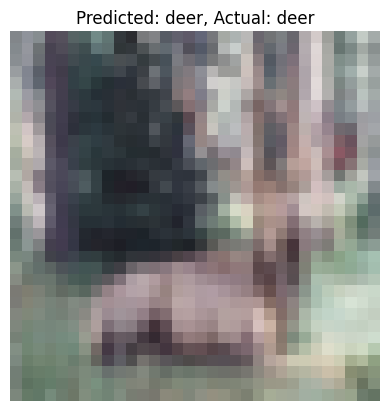

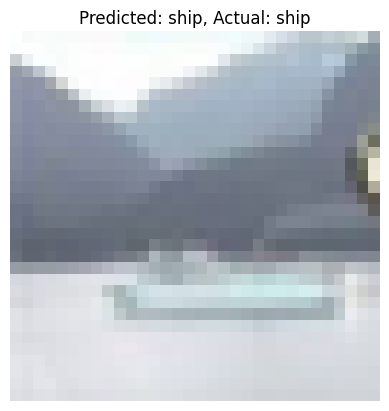

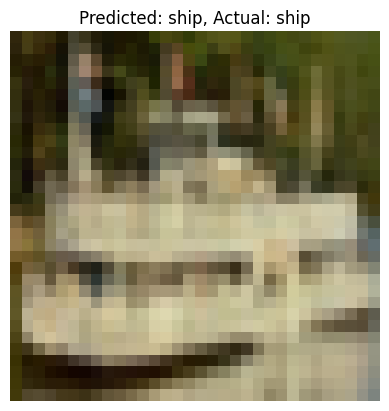

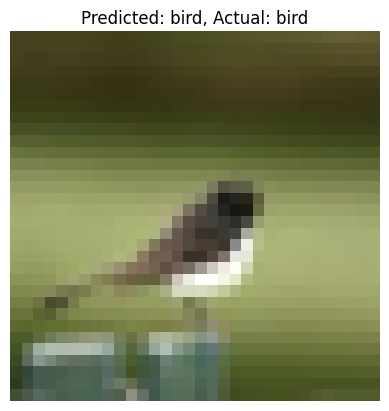

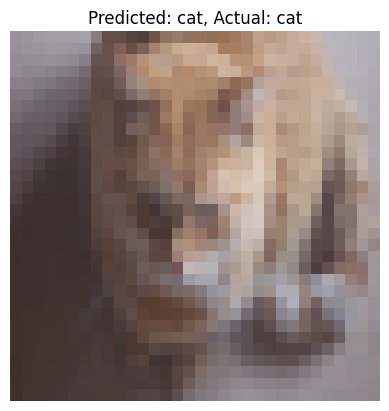

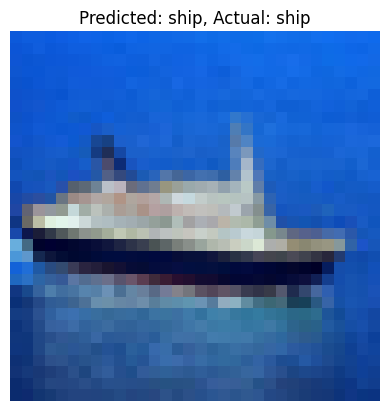

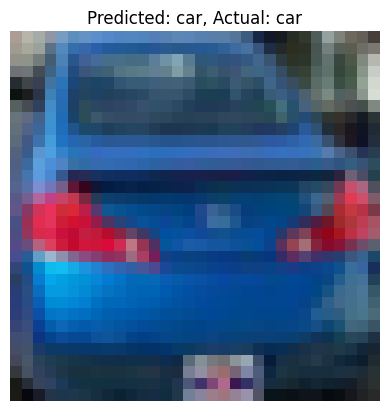

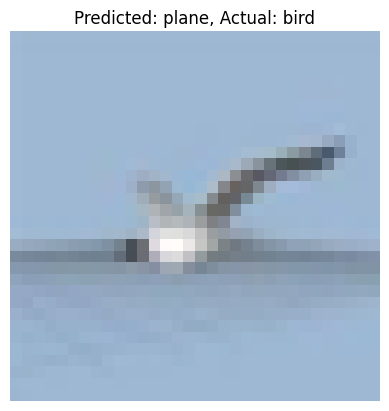

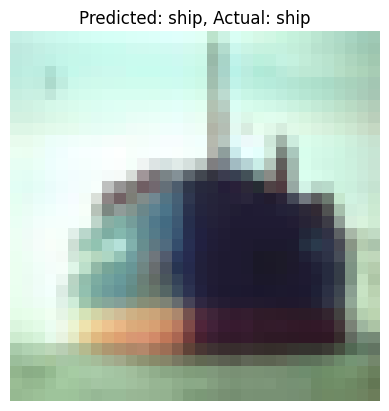

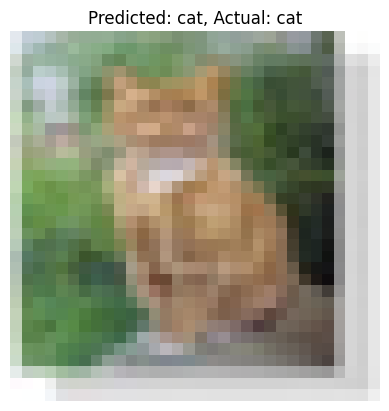

In [ ]:
# Use the loaded trained model from two cells above i.e. resnet_model in case you are loading the model
model = resnet_model

mean = [0.4914, 0.4822, 0.4465]
std = [0.2470, 0.2434, 0.2616]

# Evaluate the model on random images and display results
for _ in range(10):
    # Get a random test image
    data, target = next(iter(testloader))

    # Get model's predictions
    output, _ = model(data.to(device))
    _, predicted = torch.max(output, 1)

    # Display the image along with predicted and actual labels
    # Unnormalize the image
    display_img = data[0]
    unnormalized_image = display_img.clone()  # Create a copy to avoid modifying the original tensor
    for i in range(3):
      unnormalized_image[i] = (unnormalized_image[i] * std[i]) + mean[i]
    plt.imshow(np.transpose(unnormalized_image.numpy(), (1, 2, 0)))
    plt.title(f'Predicted: {classes[predicted[0]]}, Actual: {classes[target[0]]}')
    plt.axis('off')
    plt.show()

## Exercise

You can try to train a VGG model and perform the same steps as performed for ResNet.

# Visualising the layers

## Visualizing different layers of VGG and ResNet

In the VGG and ResNet network, as the input image progresses through the convolutional layers, it undergoes a series of transformations and feature extractions. One fascinating aspect of VGG and ResNet is the ability to visualize the learned features at different convolutional layers, which provides insights into the network's inner workings.

By examining the feature maps of various convolutional layers, we can observe how the network progressively captures different levels of abstraction. In the early layers, such as the first few convolutional layers, the network tends to learn simple and low-level features like edges, corners, and textures. These features are more local and specific to certain image regions.

As we move deeper into the network, the feature maps become more complex and abstract. Higher-level layers capture more global and semantic information, focusing on object parts, shapes, and textures. These learned features are more robust and capable of representing more complex visual patterns.

Visualizing the intermediate layers of VGG helps us understand how the network gradually builds a hierarchy of features, with each layer refining and enhancing the representations learned in the previous layers. It also highlights the network's ability to transform raw pixel values into rich, hierarchical feature representations that enable accurate image classification and object detection.

By analyzing the visualizations of different conv layers, we gain valuable insights into the network's feature learning process, offering a glimpse into how deep convolutional neural networks extract and encode meaningful visual information from images. This understanding not only aids in interpreting the network's decisions but also provides a foundation for developing improved architectures and advancing the field of computer vision.






## VGG

### Importing the necessary modules

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from PIL import Image

### Load the Model

In [ ]:
# Load the pre-trained VGG model
model = models.vgg16(pretrained=True)
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 218MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Extracting the Convolution Layers from VGG

In [ ]:
# we will save the conv layer weights in this list
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
#append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    print("Block: ", i, " : ",type(model_children[i]))
    if isinstance(model_children[i], torch.nn.modules.container.Sequential):
        for layer_num, child in enumerate(model_children[i].children()):
            print("Layer: ", layer_num, " : ",type(child))
            if isinstance(child, nn.Conv2d):
                model_weights.append(child.weight)
                conv_layers.append(child)
print(f"Total convolution layers found: {len(conv_layers)}")

Block:  0  :  <class 'torch.nn.modules.container.Sequential'>
Layer:  0  :  <class 'torch.nn.modules.conv.Conv2d'>
Layer:  1  :  <class 'torch.nn.modules.activation.ReLU'>
Layer:  2  :  <class 'torch.nn.modules.conv.Conv2d'>
Layer:  3  :  <class 'torch.nn.modules.activation.ReLU'>
Layer:  4  :  <class 'torch.nn.modules.pooling.MaxPool2d'>
Layer:  5  :  <class 'torch.nn.modules.conv.Conv2d'>
Layer:  6  :  <class 'torch.nn.modules.activation.ReLU'>
Layer:  7  :  <class 'torch.nn.modules.conv.Conv2d'>
Layer:  8  :  <class 'torch.nn.modules.activation.ReLU'>
Layer:  9  :  <class 'torch.nn.modules.pooling.MaxPool2d'>
Layer:  10  :  <class 'torch.nn.modules.conv.Conv2d'>
Layer:  11  :  <class 'torch.nn.modules.activation.ReLU'>
Layer:  12  :  <class 'torch.nn.modules.conv.Conv2d'>
Layer:  13  :  <class 'torch.nn.modules.activation.ReLU'>
Layer:  14  :  <class 'torch.nn.modules.conv.Conv2d'>
Layer:  15  :  <class 'torch.nn.modules.activation.ReLU'>
Layer:  16  :  <class 'torch.nn.modules.pool

### Load the image

Image shape before: torch.Size([3, 224, 224])
Image shape after: torch.Size([1, 3, 224, 224])


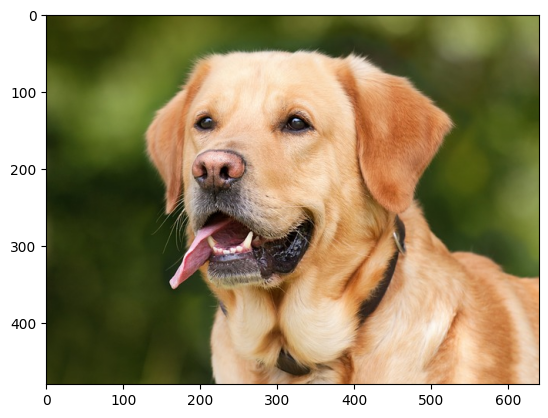

In [ ]:
image = Image.open(fp = assets_dir + 'dog_image.jpeg')
plt.imshow(image)

transform = transforms.Compose(transforms=[
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

image = transform(image)
# Reshape the image to match the input size of VGG
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")

### Run the image on the Extracted Convolution Layers and Visualise them

In [ ]:
# Set the model to evaluation mode
model.eval()

outputs = [conv_layers[0](image)]
for i in range(1, len(conv_layers)):
    outputs.append(conv_layers[i](outputs[-1]))

for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print("Layer ",num_layer+1)
    for i, filter in enumerate(layer_viz):
        if i == 16:
            break
        plt.subplot(2, 8, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    plt.show()
    plt.close()

Output hidden; open in https://colab.research.google.com to view.

## ResNet

### Imports

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import cv2 as cv
from torchvision import models, transforms

### Load the model

In [ ]:
model = models.resnet50(pretrained=True)
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 273MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Extracting the Convolution Layers from ResNet

In [ ]:
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
# get all the model children as list
model_children = list(model.children())

In [ ]:
# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 49


In [ ]:
# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) ====> SHAPE: torch.Size([64, 3, 7, 7])
CONV: Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([256, 64, 1, 1])
CONV: Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 256, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([256, 64, 1, 1])
CONV: Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 256, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

### Visualise the Filters

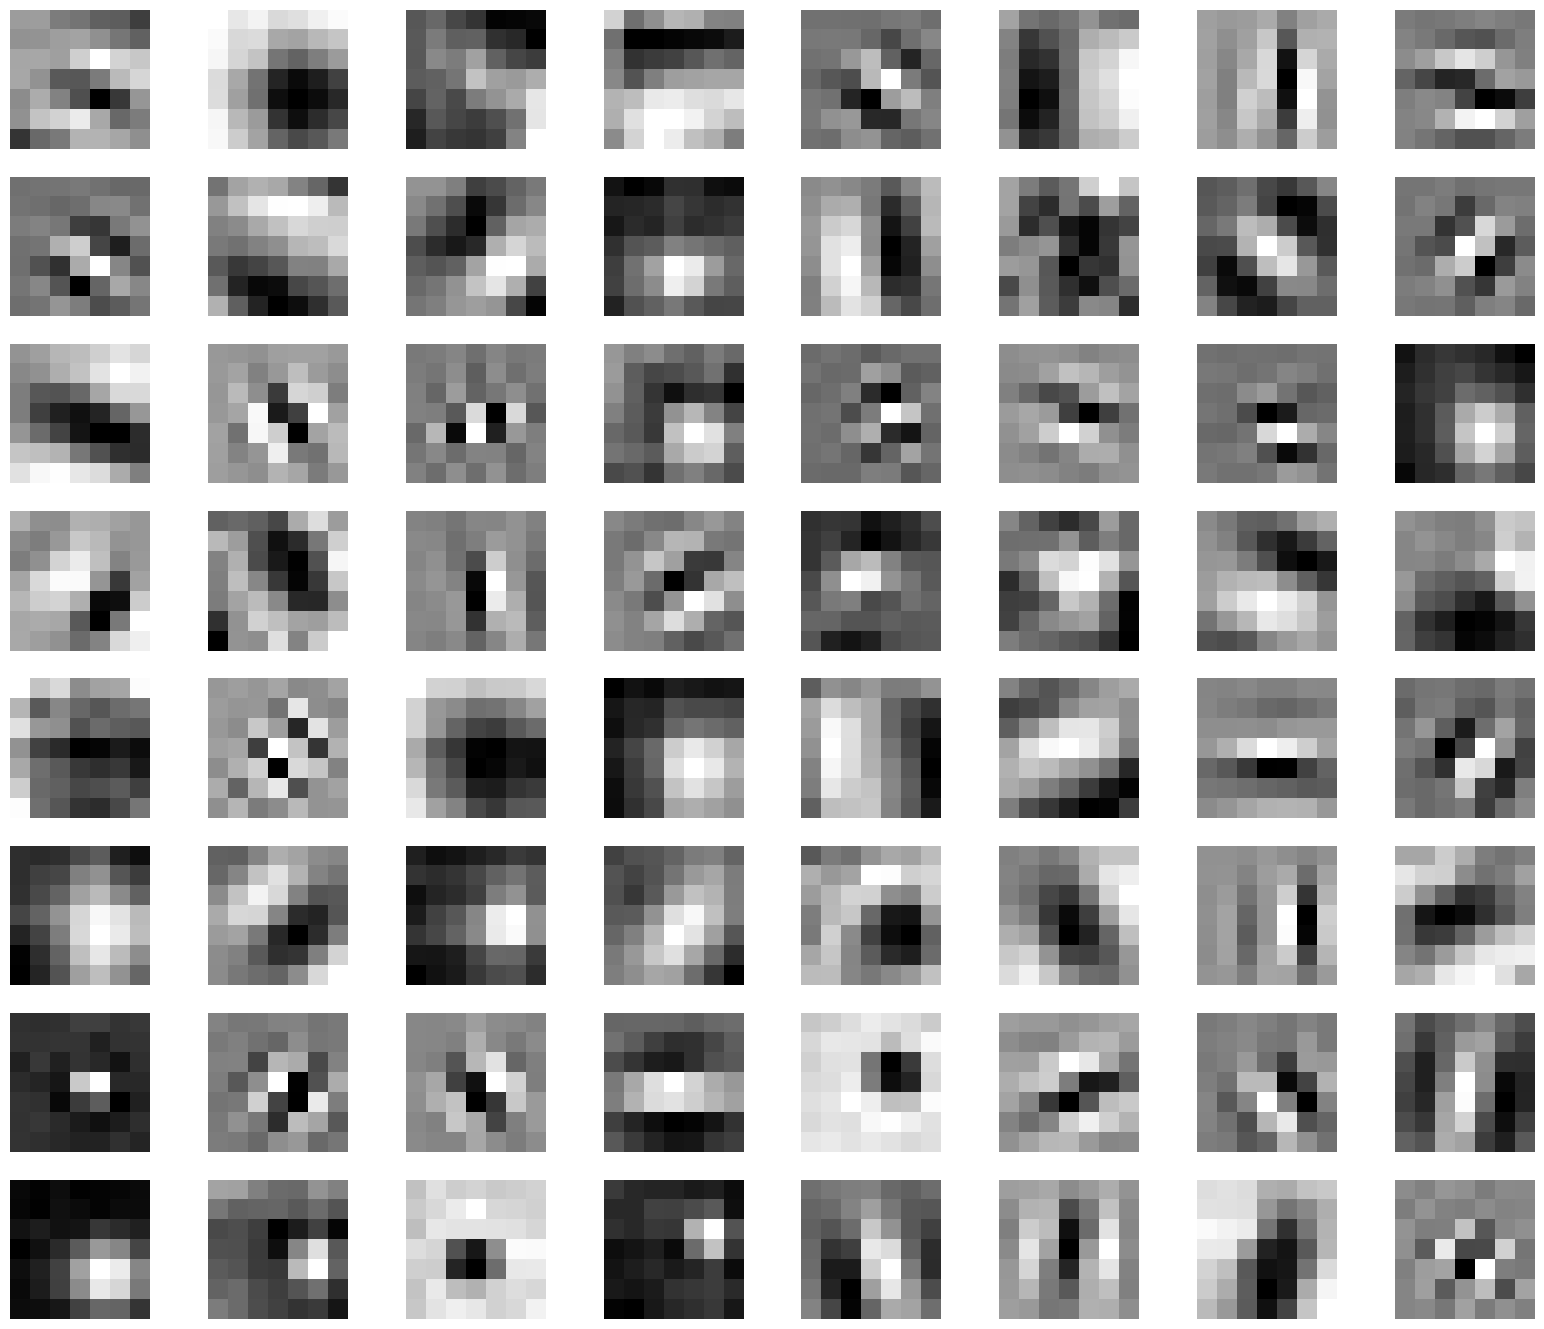

In [ ]:
# visualize the first conv layer filters
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('/content/filter.png')
plt.show()

In [ ]:
# pass the image through all the layers
results = [conv_layers[0](image)]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

### Run the image on the Extracted Convolution Layers and Visualise them

In [ ]:
# visualize 64 features from each layer
# (although there are more feature maps in the upper layers)
for num_layer in range(len(outputs)):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 64: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    print(f"Saving layer {num_layer} feature maps...")
    #plt.savefig(f"/content/layer_{num_layer}.png")
    plt.show()
    plt.close()

Output hidden; open in https://colab.research.google.com to view.